<a href="https://colab.research.google.com/github/RodrigoP1234/Pre_entrega_2/blob/main/Pre_entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo del informe**: Este trabajo tiene el objetivo de ver los movimientos de volumen y precio, pero mas importante ver que está detras de esto. Contexto: Al momento, el dataset solo incluye una gran parte del año actual. Pero al agregar, una mayor cantidad de años. Se puede observar como el volumen aumenta cuando el gobierno interviene en los tipos de cambios que se operan en la bolsa. Esto se puede ver por que a traves del tiempo aquellos instrumentos donde el gobierno interviene van cambiando, y por ende tienen mayor volumen aquellos donde ser interviene. Tambien se agrega un apartado informativo viendo como operaron distintos instrumentos, es decir cuales fueron los ganadores en cada periodo
Problema: Solución Propuesta: HIPÓTESIS DE INVESTIGACIÓN EDA Testeo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r"/content/29-02.xlsx")

In [ ]:
df.head(10)

,SIMBOLO,FECHA,VENCIMIENTO,TIPO DE SERIE,CIERRE,APERTURA,MAXIMO,MINIMO,PRECIO PROMEDIO,VOLUMEN NOMINAL,...,inflacion,merval_usd,plazo_fijo,tasa_badlar,UVI,merval,x,inflacion_diaria,plazo_fijo_diario,tasa_badlar_diaria
0,AAL,2023-01-02,48 hs.,Homogenea,2290.000,2190.000,2350.000,2100.500,2262.233,268.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
1,MTR,2023-01-02,48 hs.,Homogenea,486.382,486.382,486.382,486.382,486.382,1820.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
2,MTCGO,2023-01-02,48 hs.,Homogenea,32992.001,32604.240,33223.361,31742.654,32874.493,13792.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
3,MTCGD,2023-01-02,48 hs.,Homogenea,98.542,100.811,100.811,96.736,98.358,13440.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
4,MSTR,2023-01-02,48 hs.,Homogenea,2450.000,2400.000,2520.000,2400.000,2446.931,145.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
5,ABNBD,2023-01-02,48 hs.,Homogenea,7.900,7.900,7.900,7.900,7.900,1.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
6,MSSAO,2023-01-02,48 hs.,Homogenea,31738.019,31738.019,32298.102,31644.672,31777.596,1769.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
7,MSSAD,2023-01-02,48 hs.,Homogenea,94.714,94.714,94.714,94.714,94.714,221.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
8,MSI,2023-01-02,48 hs.,Homogenea,4329.883,4329.883,4329.883,4329.883,4329.883,3.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416
9,NDT25,2023-01-02,48 hs.,Homogenea,22944.983,22944.983,22944.983,22944.983,22944.983,25633.0,...,NaN,605.422,10360334,69.375,171.93,205709.870478,22,1.002652,39243.689394,0.006416


In [ ]:
df.tail(10)

,SIMBOLO,FECHA,VENCIMIENTO,TIPO DE SERIE,CIERRE,APERTURA,MAXIMO,MINIMO,PRECIO PROMEDIO,VOLUMEN NOMINAL,...,inflacion,merval_usd,plazo_fijo,tasa_badlar,UVI,merval,x,inflacion_diaria,plazo_fijo_diario,tasa_badlar_diaria
114049,CL,2023-11-13,48 hs.,Homogenea,22236.00,22367.50,22419.00,22236.00,22338.167,34.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114050,IRCIO,2023-11-13,48 hs.,Homogenea,97500.00,97500.00,97500.00,97500.00,97500.000,395.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114051,BB,2023-11-13,48 hs.,Homogenea,1036.00,1073.00,1080.00,1020.00,1034.279,4981.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114052,IRCID,2023-11-13,48 hs.,Homogenea,108.00,108.00,108.00,108.00,108.000,623.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114053,RTX,2023-11-13,48 hs.,Homogenea,14446.50,14278.00,14607.00,14278.00,14455.886,491.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114054,IRCHO,2023-11-13,48 hs.,Homogenea,93000.00,93900.00,94000.00,92100.00,93016.667,1416.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114055,RUC3D,2023-11-13,48 hs.,Homogenea,109.00,109.00,109.00,109.00,109.000,2610.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114056,RUC3O,2023-11-13,48 hs.,Homogenea,97500.00,95000.00,97500.00,95000.00,96114.286,3800.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114057,RIOD,2023-11-13,48 hs.,Homogenea,17.00,16.95,17.00,16.95,16.975,7.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991
114058,ZMD,2023-11-13,48 hs.,Homogenea,1.26,1.26,1.26,1.26,1.260,150.0,...,NaN,688.61,18707039,130.3125,352.41,609554.417457,8,1.003995,194864.989583,0.023991


Con respecto al trabajo anterior se resolvieron los problemas de NaNs en dolares

939
Axes(0.125,0.11;0.775x0.77)


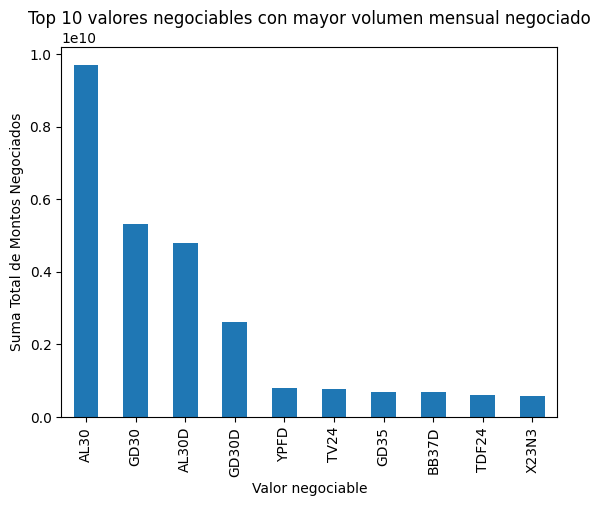

Axes(0.125,0.11;0.775x0.77)


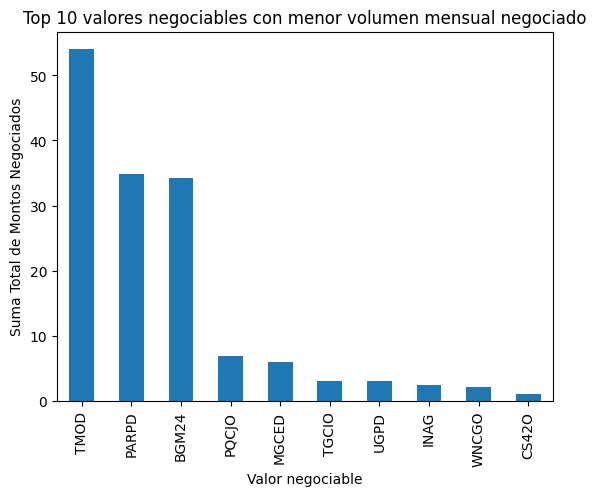

Axes(0.125,0.11;0.775x0.77)


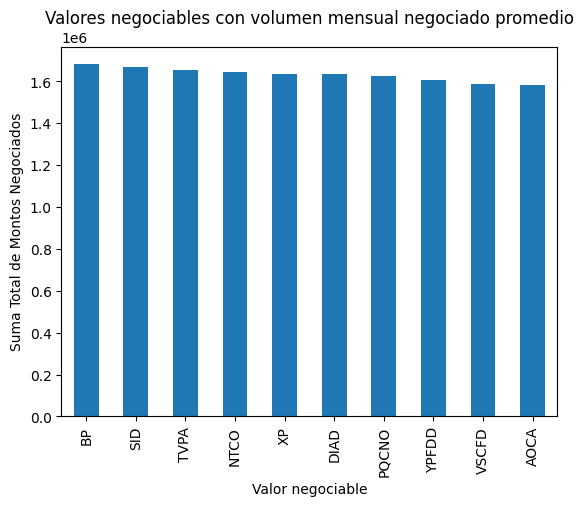

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['MND'] = df['MND'].replace(',', '').astype(float)

suma_diaria = df.groupby('SIMBOLO')['MND'].sum()
#Se suman todos los montos negociados de la misma acción
# Ordenamos las acciones
acciones_ordenadas = suma_diaria.sort_values(ascending=False)

acciones_top_10 = acciones_ordenadas.head(10)
acciones_bottom_10 = acciones_ordenadas.tail(10)
print(len(acciones_ordenadas))
acciones_mid_10= acciones_ordenadas[370:380] #Valores distribuidos mas o menos en el centro

print(acciones_top_10.plot(kind = "bar"))
plt.title('Top 10 valores negociables con mayor volumen mensual negociado')
plt.xlabel('Valor negociable')
plt.ylabel('Suma Total de Montos Negociados')
plt.show()

print(acciones_bottom_10.plot(kind = "bar"))
plt.title('Top 10 valores negociables con menor volumen mensual negociado')
plt.xlabel('Valor negociable')
plt.ylabel('Suma Total de Montos Negociados')
plt.show()

print(acciones_mid_10.plot(kind = "bar"))
plt.title('Valores negociables con volumen mensual negociado promedio')
plt.xlabel('Valor negociable')
plt.ylabel('Suma Total de Montos Negociados')
plt.show()

Los valores que se encuentran en bottom incluyen aquellos en los que se negocio muy pocos, generalmente se va a trabajar con el top 10

<class 'pandas.core.series.Series'>
SIMBOLO
AL30     9.696186e+09
GD30     5.323088e+09
AL30D    4.796999e+09
GD30D    2.624704e+09
YPFD     7.920575e+08
TV24     7.614404e+08
GD35     6.914972e+08
BB37D    6.891455e+08
TDF24    6.077171e+08
X23N3    5.726376e+08
Name: MND, dtype: float64


<Figure size 1200x600 with 0 Axes>

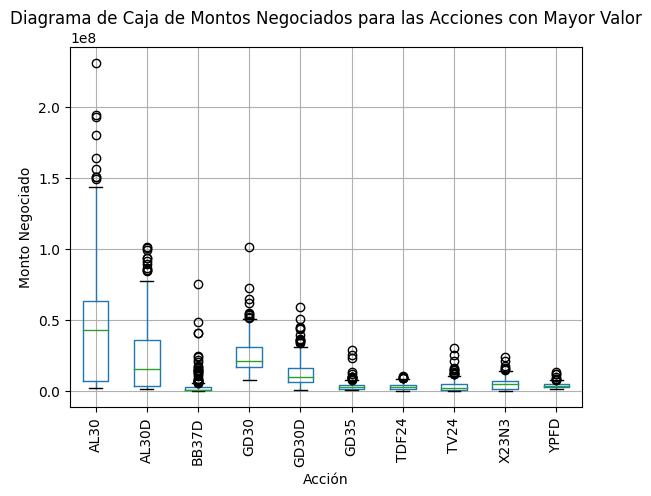

<Figure size 1200x600 with 0 Axes>

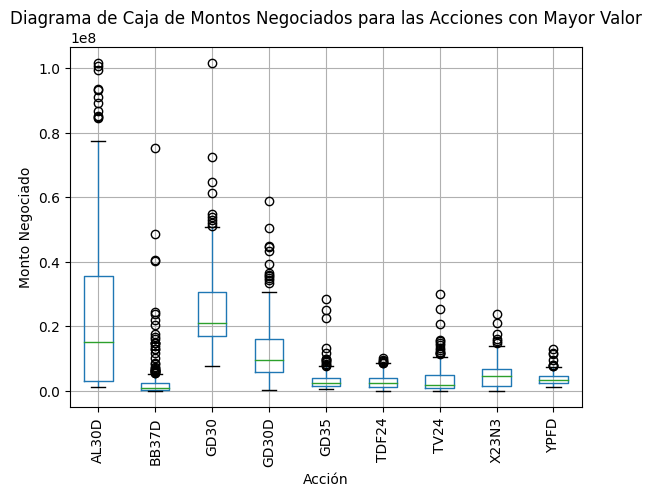

In [ ]:
acciones_mayor_valor = suma_diaria.nlargest(10)
print(type(acciones_mayor_valor))
acciones_mayor_valor_sin_al = acciones_mayor_valor.drop("AL30")
print(acciones_mayor_valor)
acciones_mayor_valor_sin_al
# El filtro para que solo incluye a las 10 con mayor volumen y otra sin incluir el AL30 ya que
# dado su volumen, distorsiona el grafico.
df_filtrado1 = df[df['SIMBOLO'].isin(acciones_mayor_valor.index)]
df_filtrado2 = df[df['SIMBOLO'].isin(acciones_mayor_valor_sin_al.index)]

plt.figure(figsize=(12, 6))
df_filtrado1.boxplot(column='MND', by='SIMBOLO')
plt.title('Diagrama de Caja de Montos Negociados para las Acciones con Mayor Valor')
plt.suptitle('')  # Para que no se superponga el titulo
plt.xlabel('Acción')
plt.ylabel('Monto Negociado')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 6))
df_filtrado2.boxplot(column='MND', by='SIMBOLO')
plt.title('Diagrama de Caja de Montos Negociados para las Acciones con Mayor Valor')
plt.suptitle('')  # Para que no se superponga el titulo
plt.xlabel('Acción')
plt.ylabel('Monto Negociado')
plt.xticks(rotation=90)
plt.show()


Luego de incluir el precio del dolar, como era de esperar aparece otro ticker muy importante como AL30D, este, junto a AL30, se utilizan para fijar dolar mep.

Aca vemos las distribuciones de los volumenes de aquellas que están en el top, limitando por los volumenes maximos/minimos.En este caso se podría ver que ocurre en aquellos que tienen alto volumen ¿Ocurren algunos en el mismo día? ¿Coincide con algún suceso?

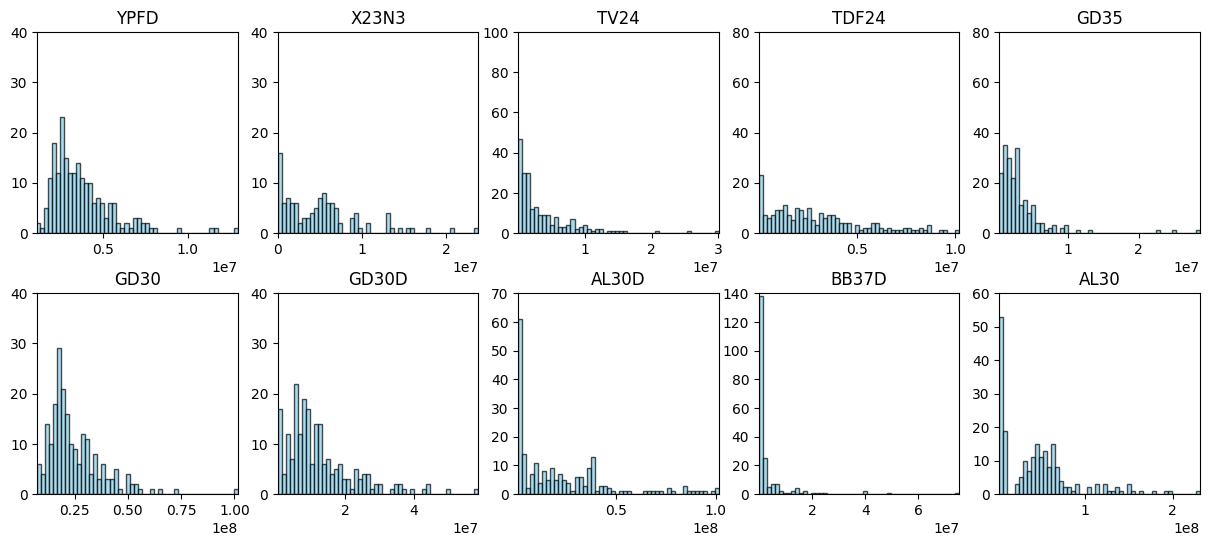

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

top = df[df['SIMBOLO'].isin(acciones_top_10.index)]


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.3)

limits_top = {'YPFD': (1145826, 12953748, 0, 40),
              'X23N3': (0, 23794092, 0, 40),
              'TV24': (9046, 30089877, 0, 100),
              'TDF24': (3429, 10203367, 0, 80),
              'GD35': (404597, 28574472, 0, 80),
              'GD30': (7513734, 101548581, 0, 40),
              'GD30D': (333499, 58755009, 0, 40),
              'AL30D': (1267595, 101512510, 0, 70),
              'BB37D': (426, 75380589, 0, 140),
              'AL30': (2974745, 230871884.6899074, 0, 60)}

for ax, (symbol, limits) in zip(axes.flat, limits_top.items()):
    subset = top[top['SIMBOLO'] == symbol]
    ax.hist(subset['MND'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(symbol)
    ax.set_xlim(limits[0], limits[1])
    ax.set_ylim(limits[2], limits[3])

plt.show()

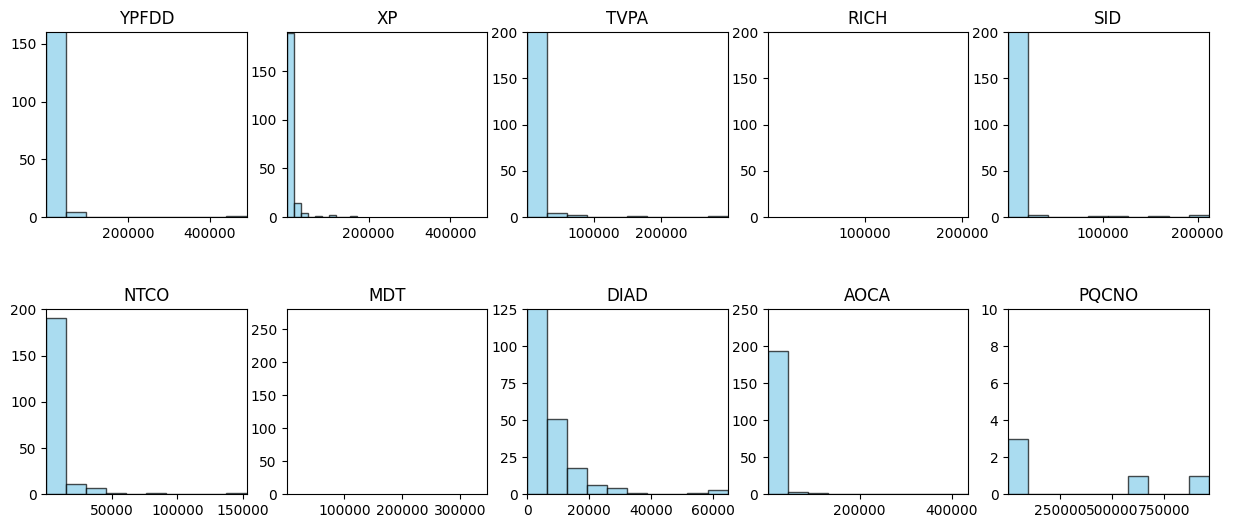

In [ ]:
mid = df[df['SIMBOLO'].isin(acciones_mid_10.index)]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5)

limits_mid = {'YPFDD': (25, 489425, 0, 160),
              'XP': (52, 489425, 0, 190),
              'TVPA': (1, 299290, 0, 200),
              'RICH': (166, 205846, 0, 200),
              'SID': (17, 211460, 0, 200),
              'NTCO': (83, 152627, 0, 200),
              'MDT': (37, 347002, 0, 280),
              'DIAD': (0, 64814, 0, 125),
              'AOCA': (10, 435505, 0, 250),
              'PQCNO': (251, 963632, 0, 10)}

for ax, (symbol, limits) in zip(axes.flat, limits_mid.items()):
    subset = mid[mid['SIMBOLO'] == symbol]
    ax.hist(subset['MND'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(symbol)
    ax.set_xlim(limits[0], limits[1])
    ax.set_ylim(limits[2], limits[3])

plt.show()

Una cosa a explorar sería como se distribuyen dentro de los bins que tienen el 0 dentro de su conjunto. Probablente, tengamos muchos periodos donde se negociaron pocos dolares. Otra particularidad es el ticker PQCNO, aunque al parecer se operó en pocas ruedas con un gran volumen.

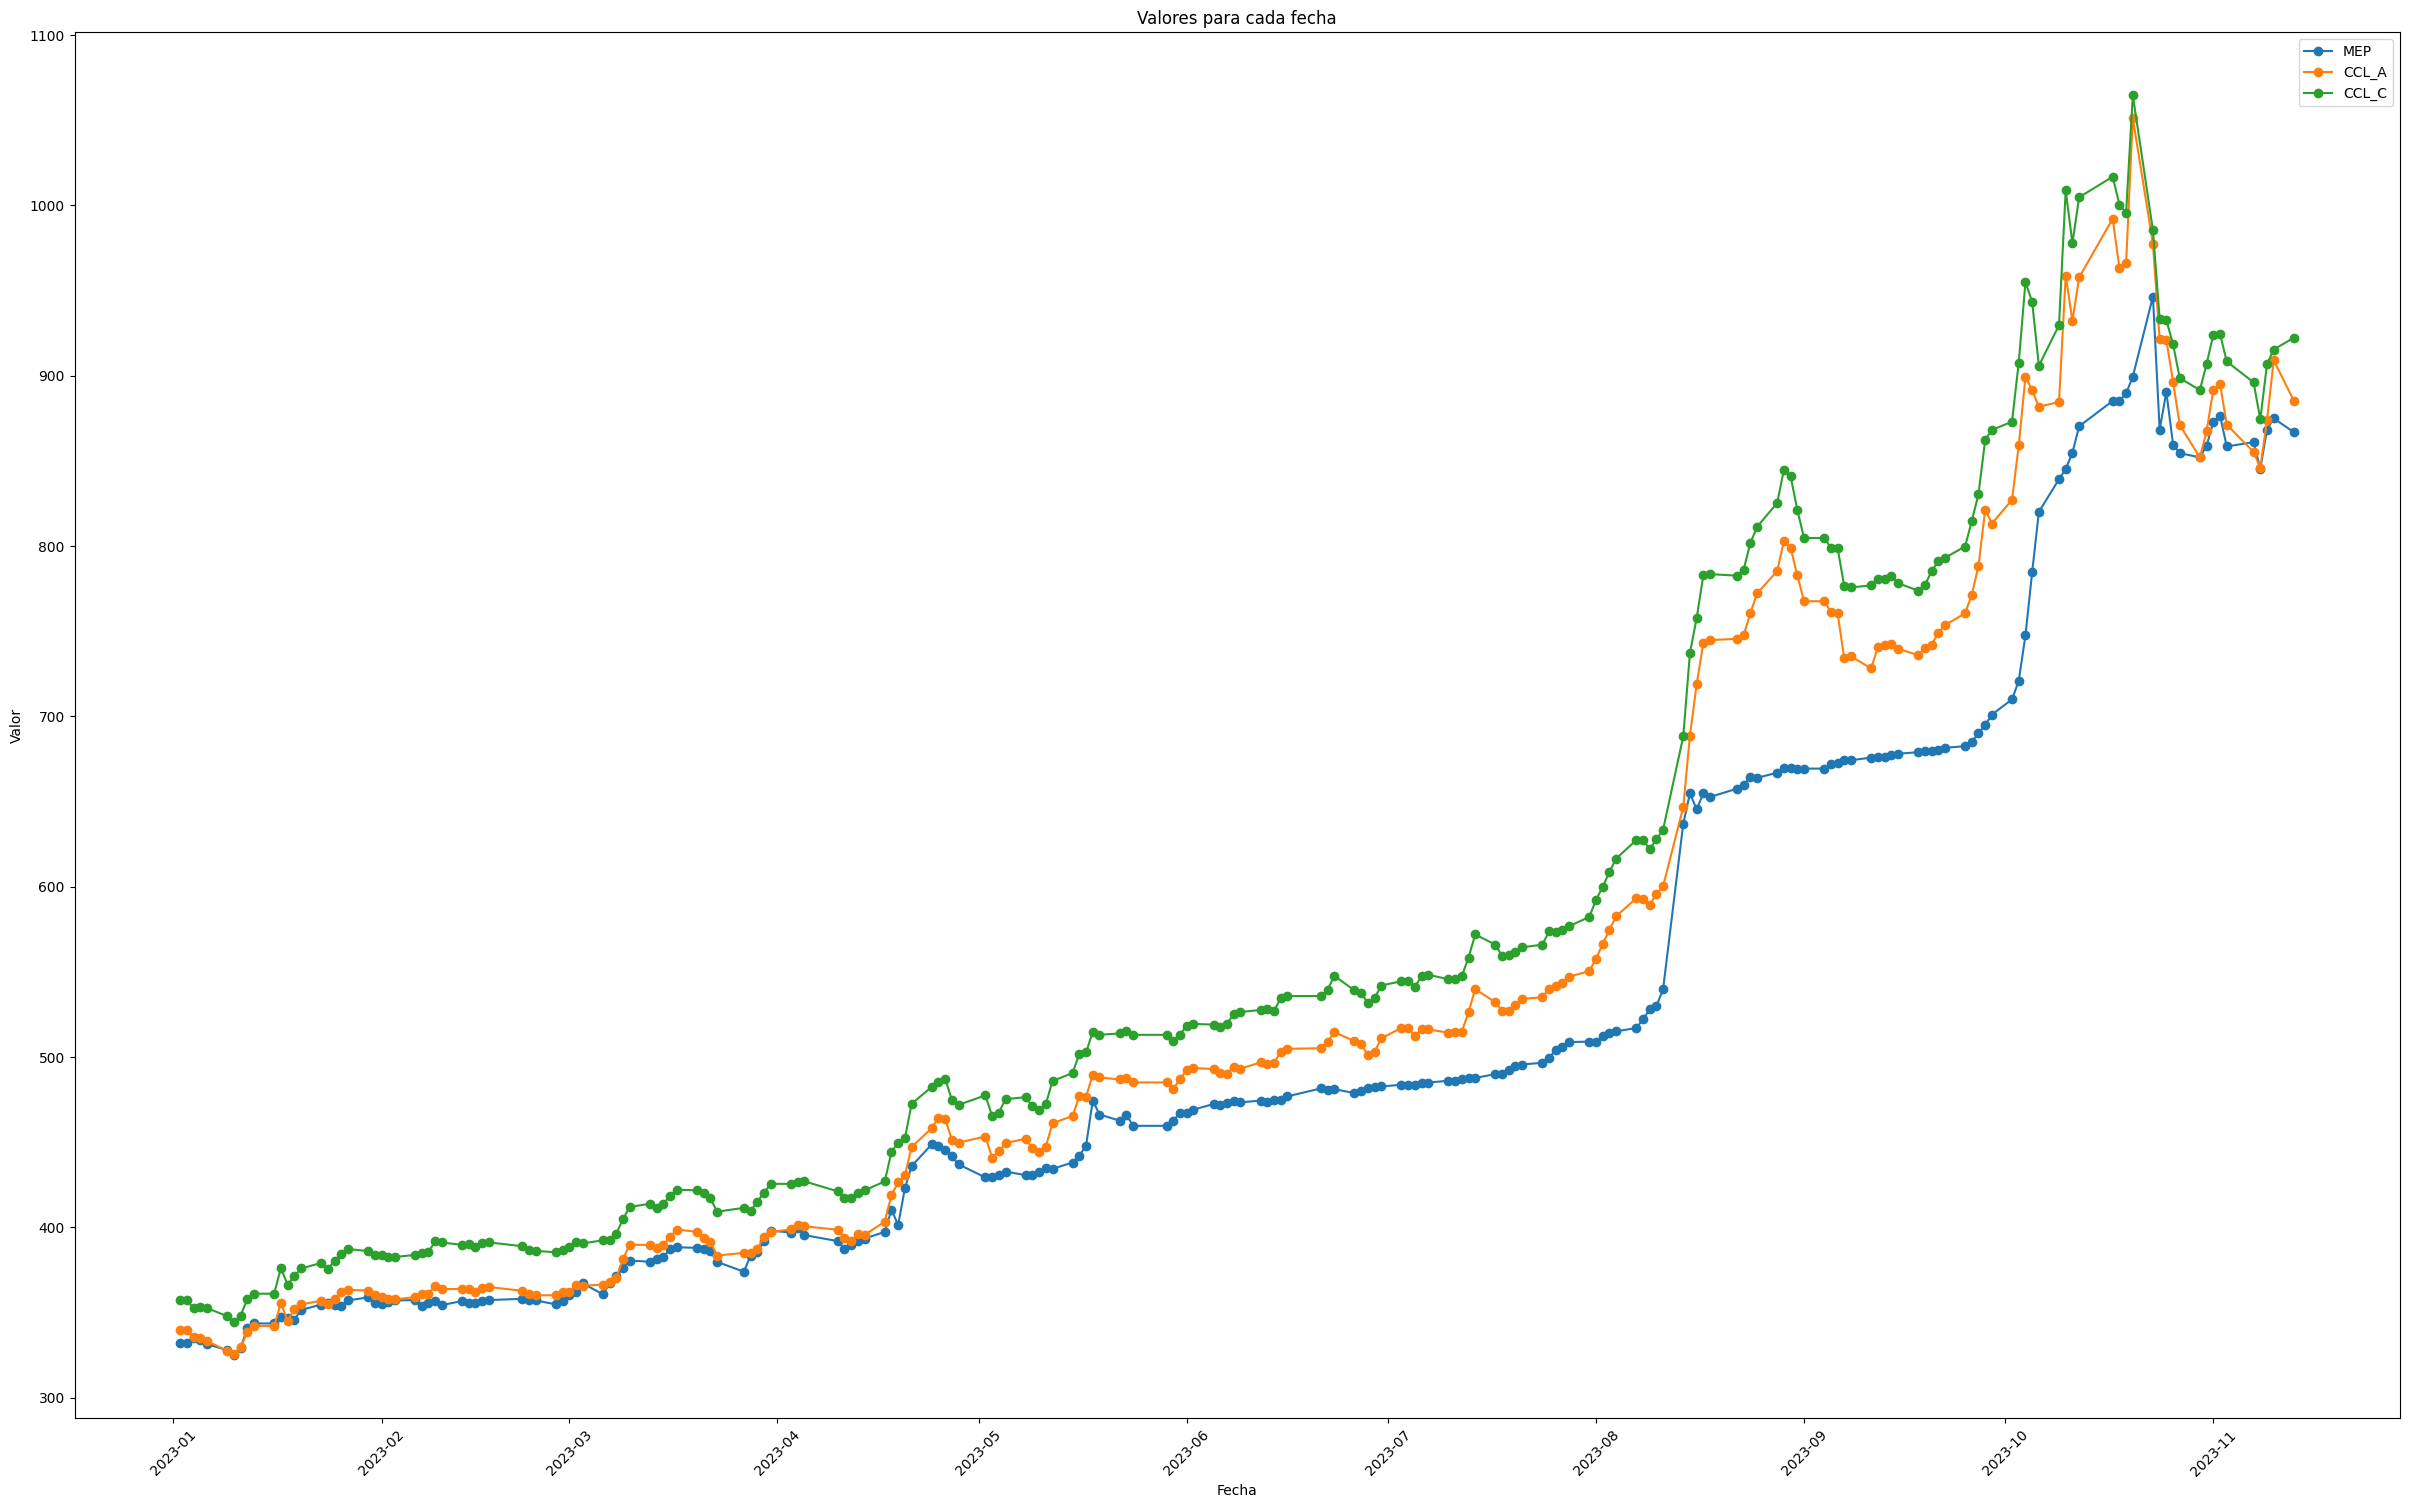

In [ ]:
fechas = df['FECHA'].unique()
#print(fechas)

data_por_fecha = {}

for fecha in fechas:
    filas_por_fecha = df[df['FECHA'] == fecha]

    valores_dolar = filas_por_fecha['MEP'].unique().tolist()
    valores_ccl_a = filas_por_fecha['CCL_A'].unique().tolist()
    valores_ccl_c = filas_por_fecha['CCL_C'].unique().tolist()


    data_por_fecha[fecha] = {'MEP': valores_dolar, 'CCL_A': valores_ccl_a, 'CCL_C': valores_ccl_c}
fechas_ordenadas = sorted(data_por_fecha.keys())

valores_mep = [data_por_fecha[fecha]['MEP'][0] for fecha in fechas_ordenadas]
valores_ccl_a = [data_por_fecha[fecha]['CCL_A'][0] for fecha in fechas_ordenadas]
valores_ccl_c = [data_por_fecha[fecha]['CCL_C'][0] for fecha in fechas_ordenadas]

plt.figure(figsize=(30, 18))
plt.plot(fechas_ordenadas, valores_mep, label='MEP', marker='o')
plt.plot(fechas_ordenadas, valores_ccl_a, label='CCL_A', marker='o')
plt.plot(fechas_ordenadas, valores_ccl_c, label='CCL_C', marker='o')

plt.title('Valores para cada fecha')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend()



En este grafico de los valores de los 3 dolares, se puede observar como el valor mep hace de limite inferior entre las 3. Sería bueno investigar por que se da esto. Por otro lado investigar que pasó en cada fecha que el valor rebotó en de una manera brusca. Se puede ver el primer salto luego de las paso

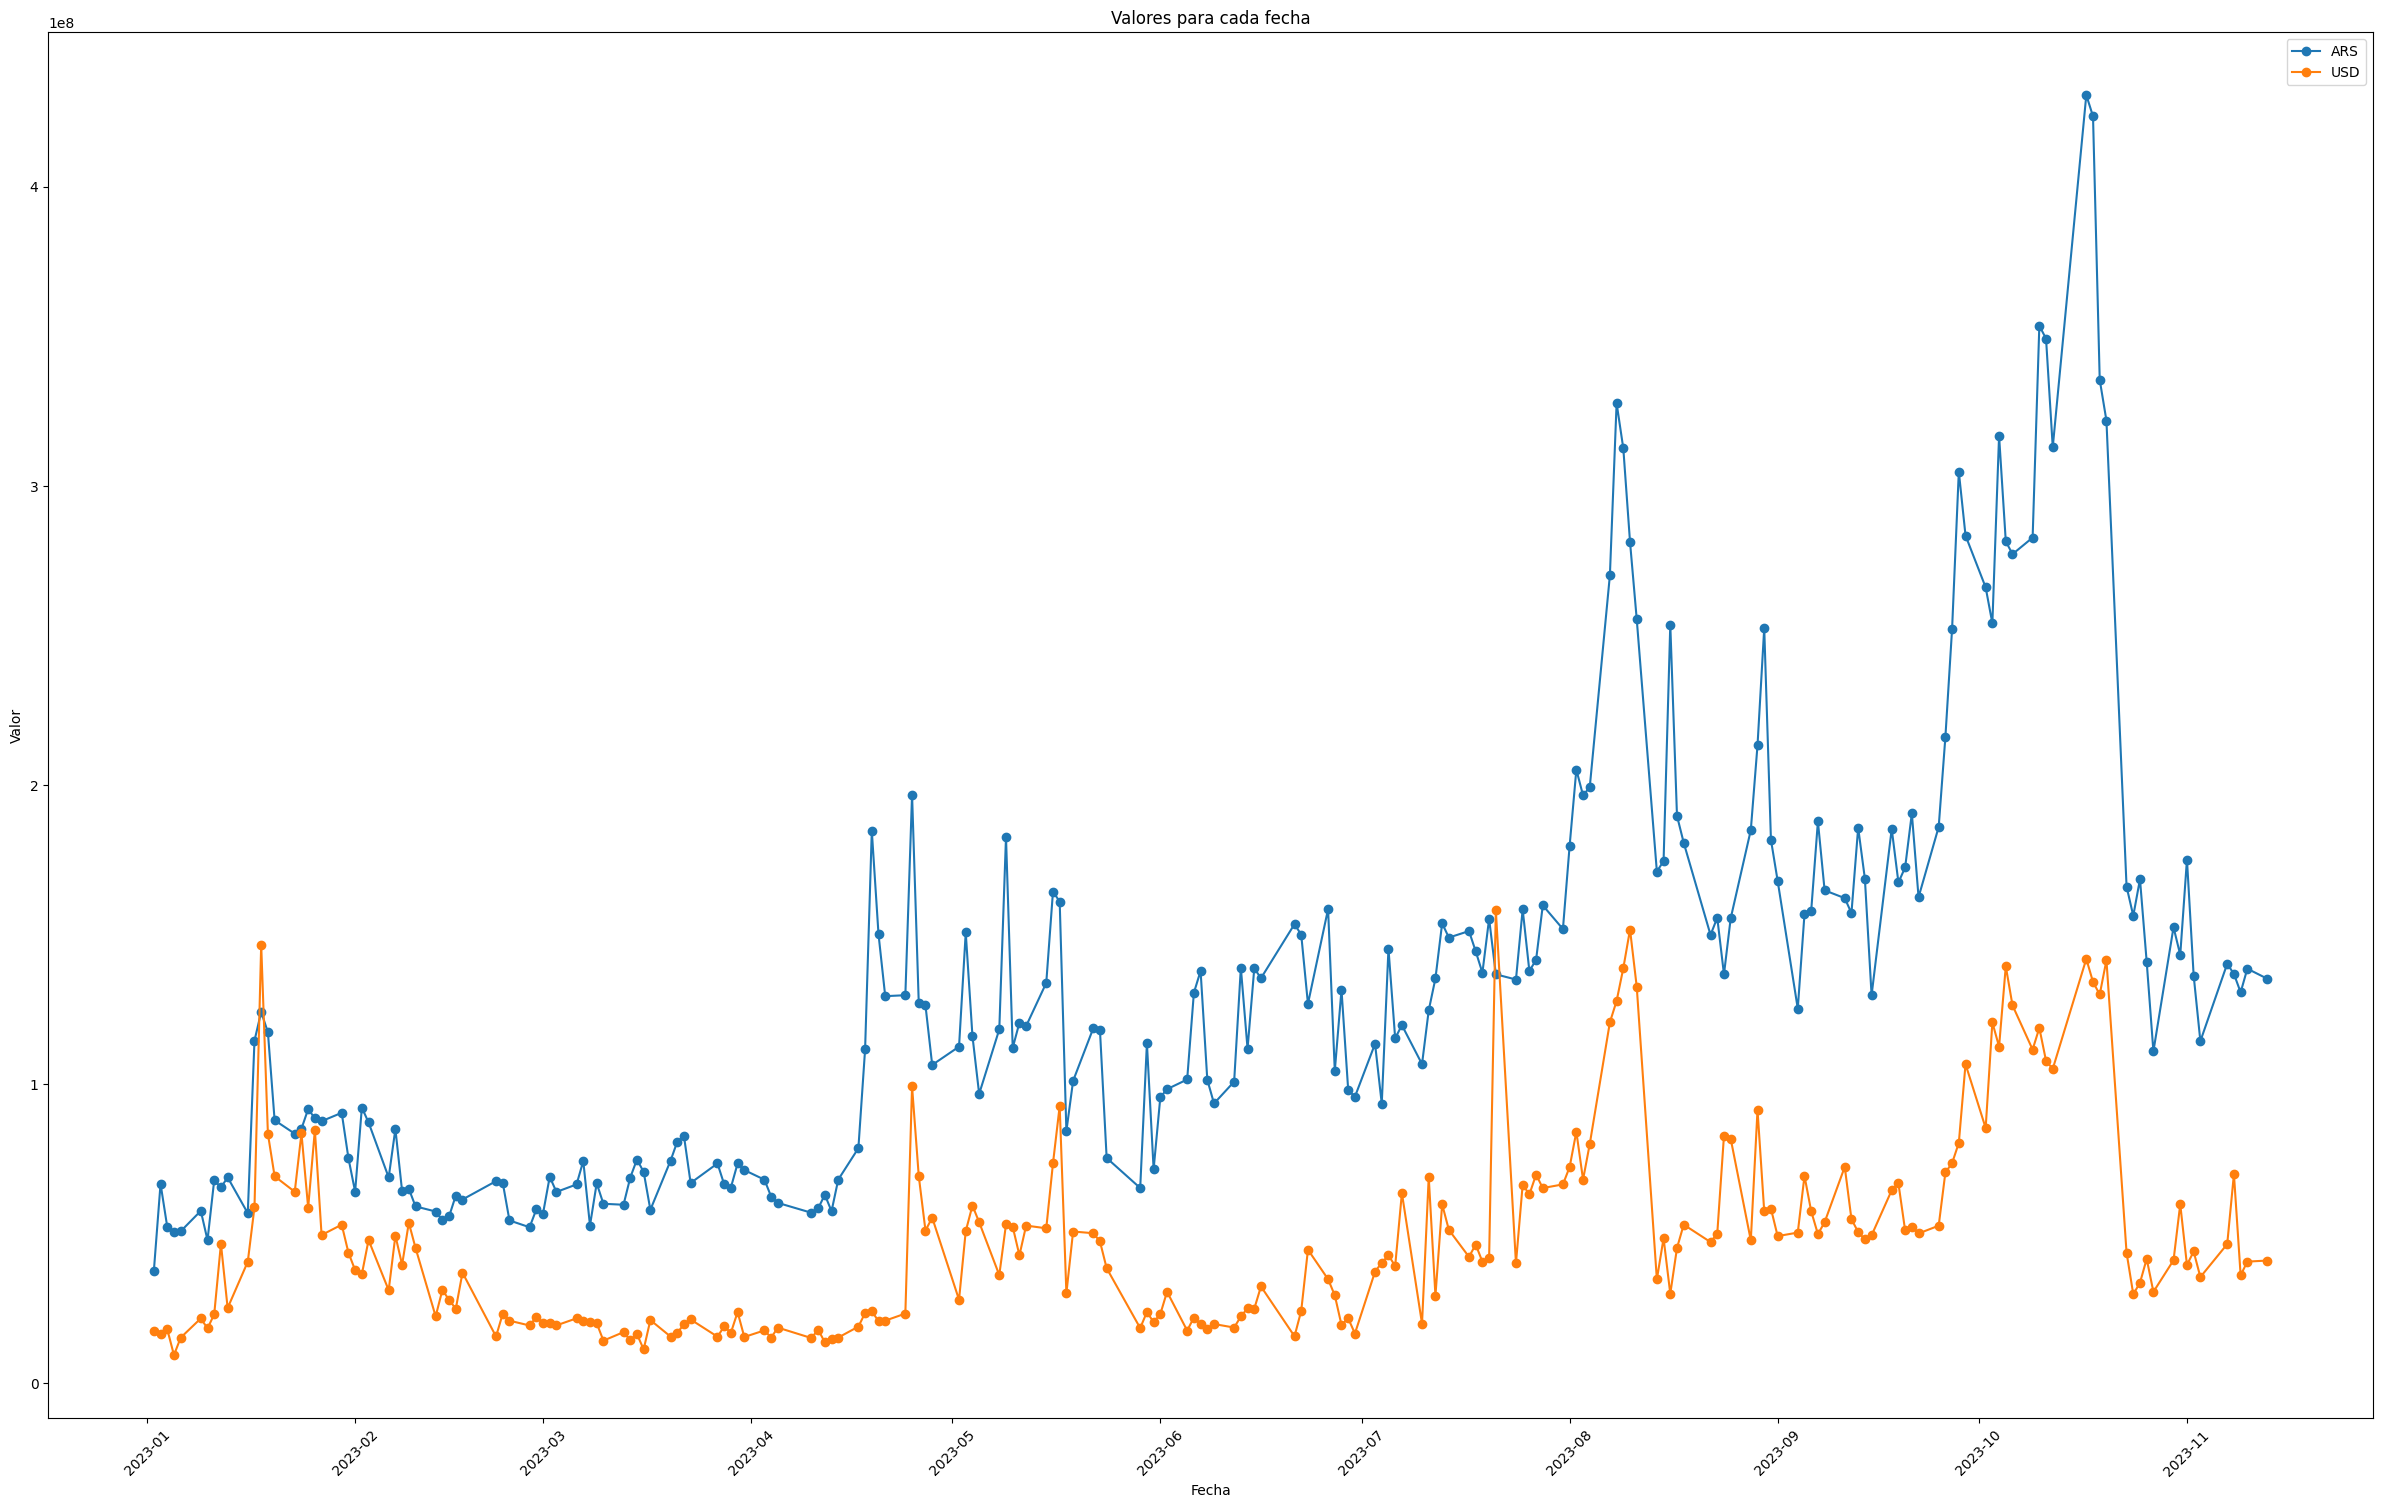

In [ ]:
fechas = df['FECHA'].unique()
#print(fechas)

data_por_fecha = {}

for fecha in fechas:
    filas_por_fecha = df[df['FECHA'] == fecha]

    pesos = 0
    dolares = 0

    for index, row in filas_por_fecha.iterrows():
        if row['MONEDA'] == 'ARS':
            pesos += row['MND']
        elif row['MONEDA'] == 'USD':
            dolares += row['MND']

    data_por_fecha[fecha] = {'Pesos': pesos, 'Dolares': dolares}
fechas_ordenadas = sorted(data_por_fecha.keys())

pesos = [data_por_fecha[fecha]['Pesos'] for fecha in fechas_ordenadas]
dolares = [data_por_fecha[fecha]['Dolares'] for fecha in fechas_ordenadas]

plt.figure(figsize=(30, 18))
plt.plot(fechas_ordenadas, pesos, label='ARS', marker='o')
plt.plot(fechas_ordenadas, dolares, label='USD', marker='o')

plt.title('Valores para cada fecha')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend()
plt.show()



Como era esperable, el volumen negociados en pesos es mayor a aquel en dolares. Sería interesante saber por que se da esto, mi hipótesis es que esto se da por las regulaciones.

<Axes: xlabel='MONEDA', ylabel='MND'>

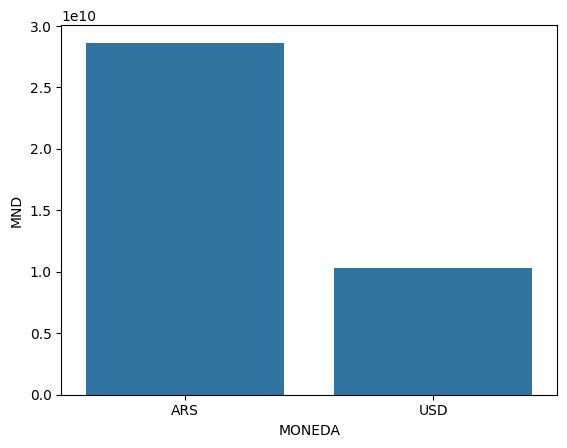

In [ ]:
import seaborn as sas
import pandas as pd
#df = pd.read_excel(r'/content/df_resultado.xlsx')
moneda_suma = df.groupby('MONEDA')['MND'].sum().reset_index()

sas.barplot(data=moneda_suma, x="MONEDA", y="MND")

In [ ]:
fechas = df['FECHA'].unique()
#print(fechas)

data_por_fecha = {}

for fecha in fechas:
    filas_por_fecha = df[df['FECHA'] == fecha]

    CEDEAR = 0
    Panel_Lider = 0
    Panel_General = 0
    ONS = 0
    Titulos_Publicos = 0
    Otro = 0
    for index, row in filas_por_fecha.iterrows():
      if row['Clasificacion'] == "CEDEAR":
        CEDEAR += row['MND']
      elif row['Clasificacion'] == "Panel Lider":
        Panel_Lider += row['MND']
      elif row['Clasificacion'] == "Panel General":
        Panel_General += row['MND']
      elif row['Clasificacion'] == "ONS":
        ONS += row['MND']
      elif row['Clasificacion'] == "Titulos Publicos":
        Titulos_Publicos += row['MND']
      elif row['Clasificacion'] == "Otro":
        Otro += row['MND']

    data_por_fecha[fecha] = {'CEDEAR': CEDEAR, "Panel Lider": Panel_Lider,'Panel General': Panel_General, 'ONS': ONS,'Titulos Publicos': Titulos_Publicos, 'Otro': Otro}
fechas_ordenadas = sorted(data_por_fecha.keys())

c = [data_por_fecha[fecha]['CEDEAR'] for fecha in fechas_ordenadas]
pl = [data_por_fecha[fecha]['Panel Lider'] for fecha in fechas_ordenadas]
pg = [data_por_fecha[fecha]['Panel General'] for fecha in fechas_ordenadas]
ons = [data_por_fecha[fecha]['ONS'] for fecha in fechas_ordenadas]
tp = [data_por_fecha[fecha]['Titulos Publicos'] for fecha in fechas_ordenadas]
otro = [data_por_fecha[fecha]['Otro'] for fecha in fechas_ordenadas]

plt.figure(figsize=(30, 18))
plt.plot(fechas_ordenadas, c, label='CEDEAR', marker='o')
plt.plot(fechas_ordenadas, pl, label='Panel Lider', marker='o')
plt.plot(fechas_ordenadas, pg, label='Panel General', marker='o')
plt.plot(fechas_ordenadas, ons, label='ONS', marker='o')
#plt.plot(fechas_ordenadas, tp, label='Titulos Publicos', marker='o')
plt.plot(fechas_ordenadas, otro, label='Otro', marker='o')

plt.title('Valores para cada fecha')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend()
plt.show()

En este caso se resaltan dos cosas. La clasificación titulos públicos que se encuentra omitida por su gran volumen, esto puede deberse a que se puede subdividir Esto en letras y bonos, habría que indagar si esto vale la pena o no. Por otro lado vemos picos muy marcados en las clasif cedears y panel lider Esto también es válido de indagar. ¿Por que ocurre esto? ¿Que pasó en esos días? ¿Es un error de la base datos?. Los titulos publicos cuentan con un gran volumen por la intervención del estado en los mercados secundarios, sería interesante ver que ocurrió en aquellos periodos donde no se intervino, mi hipotesis es que esto es, en gran medida, por la intervención.

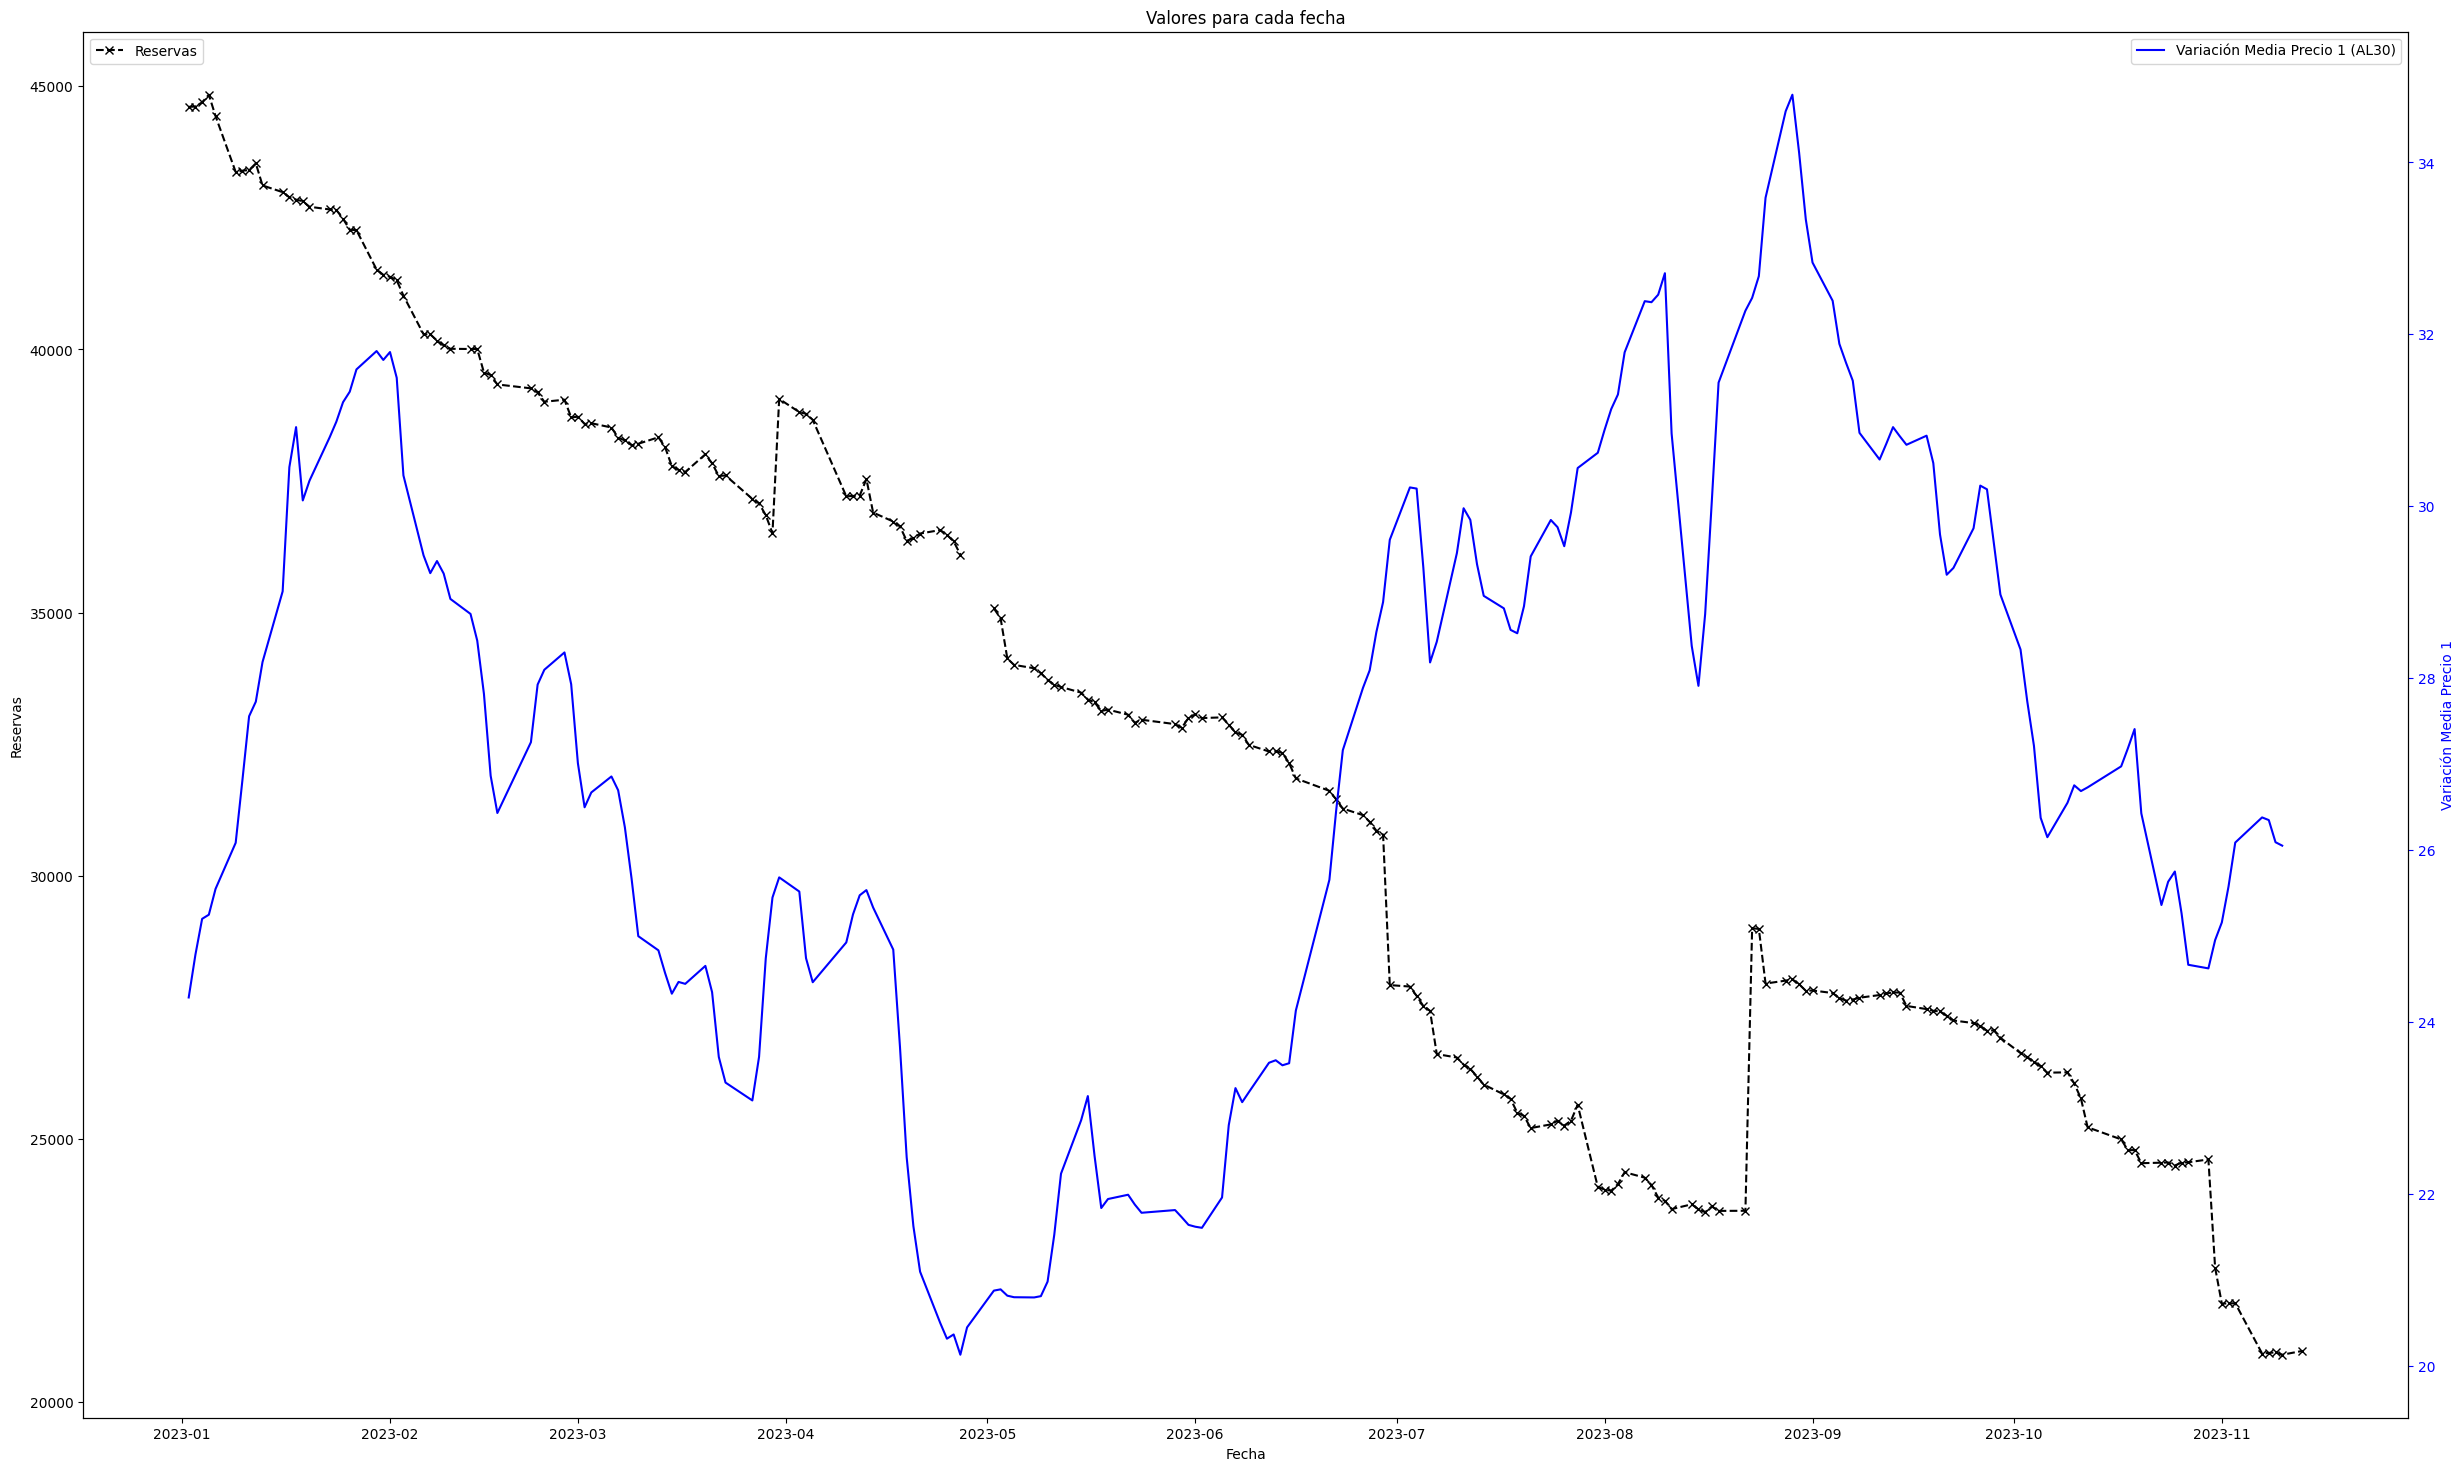

In [ ]:
fechas = df['FECHA'].unique()
data_por_fecha = {}

for fecha in fechas:
    filas_por_fecha = df[df['FECHA'] == fecha]
    valores_r = filas_por_fecha['Reservas'].unique().tolist()
    data_por_fecha[fecha] = {"Reservas": valores_r}

fechas_ordenadas = sorted(data_por_fecha.keys())
valores_r = [data_por_fecha[fecha]['Reservas'][0] for fecha in fechas_ordenadas]

variacion_media_precio1_al30 = df[df['SIMBOLO'] == 'AL30D'].groupby('FECHA')['Media_Precio_1'].mean()

fig, ax1 = plt.subplots(figsize=(30, 18))

ax1.plot(fechas_ordenadas, valores_r, label='Reservas', marker='x', linestyle='--', color='black')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Reservas', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(variacion_media_precio1_al30.index, variacion_media_precio1_al30.values, label='Variación Media Precio 1 (AL30)', linestyle='-', color='blue')
ax2.set_ylabel('Variación Media Precio 1', color='blue')
ax2.tick_params('y', colors='blue')
ax2.legend(loc='upper right')

plt.title('Valores para cada fecha')
plt.xticks(rotation=45)
plt.show()


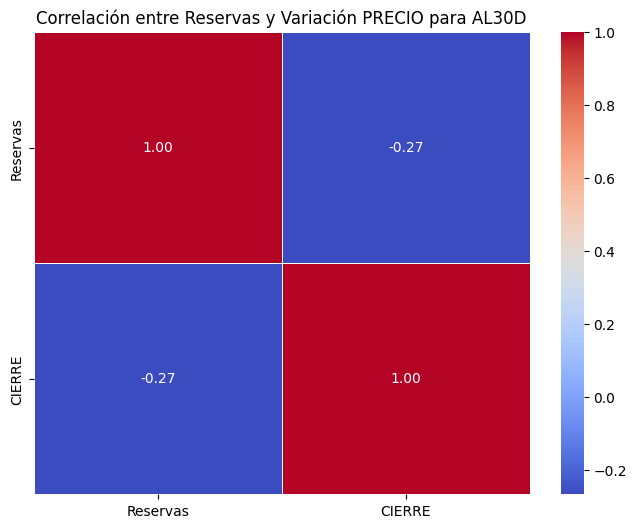

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_al30 = df[df['SIMBOLO'] == 'AL30D']

correlation_matrix = df_al30[['Reservas', 'CIERRE']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre Reservas y Variación PRECIO para AL30D')
plt.show()

Desde mi hipótesis esta correlación debería ser positiva ya que que a menores reservas existen mayor riesgo de impago de deuda y por ende menor valor de los bonos, y viceversa.
Los resultados fueron que la correlación es de -0.27.




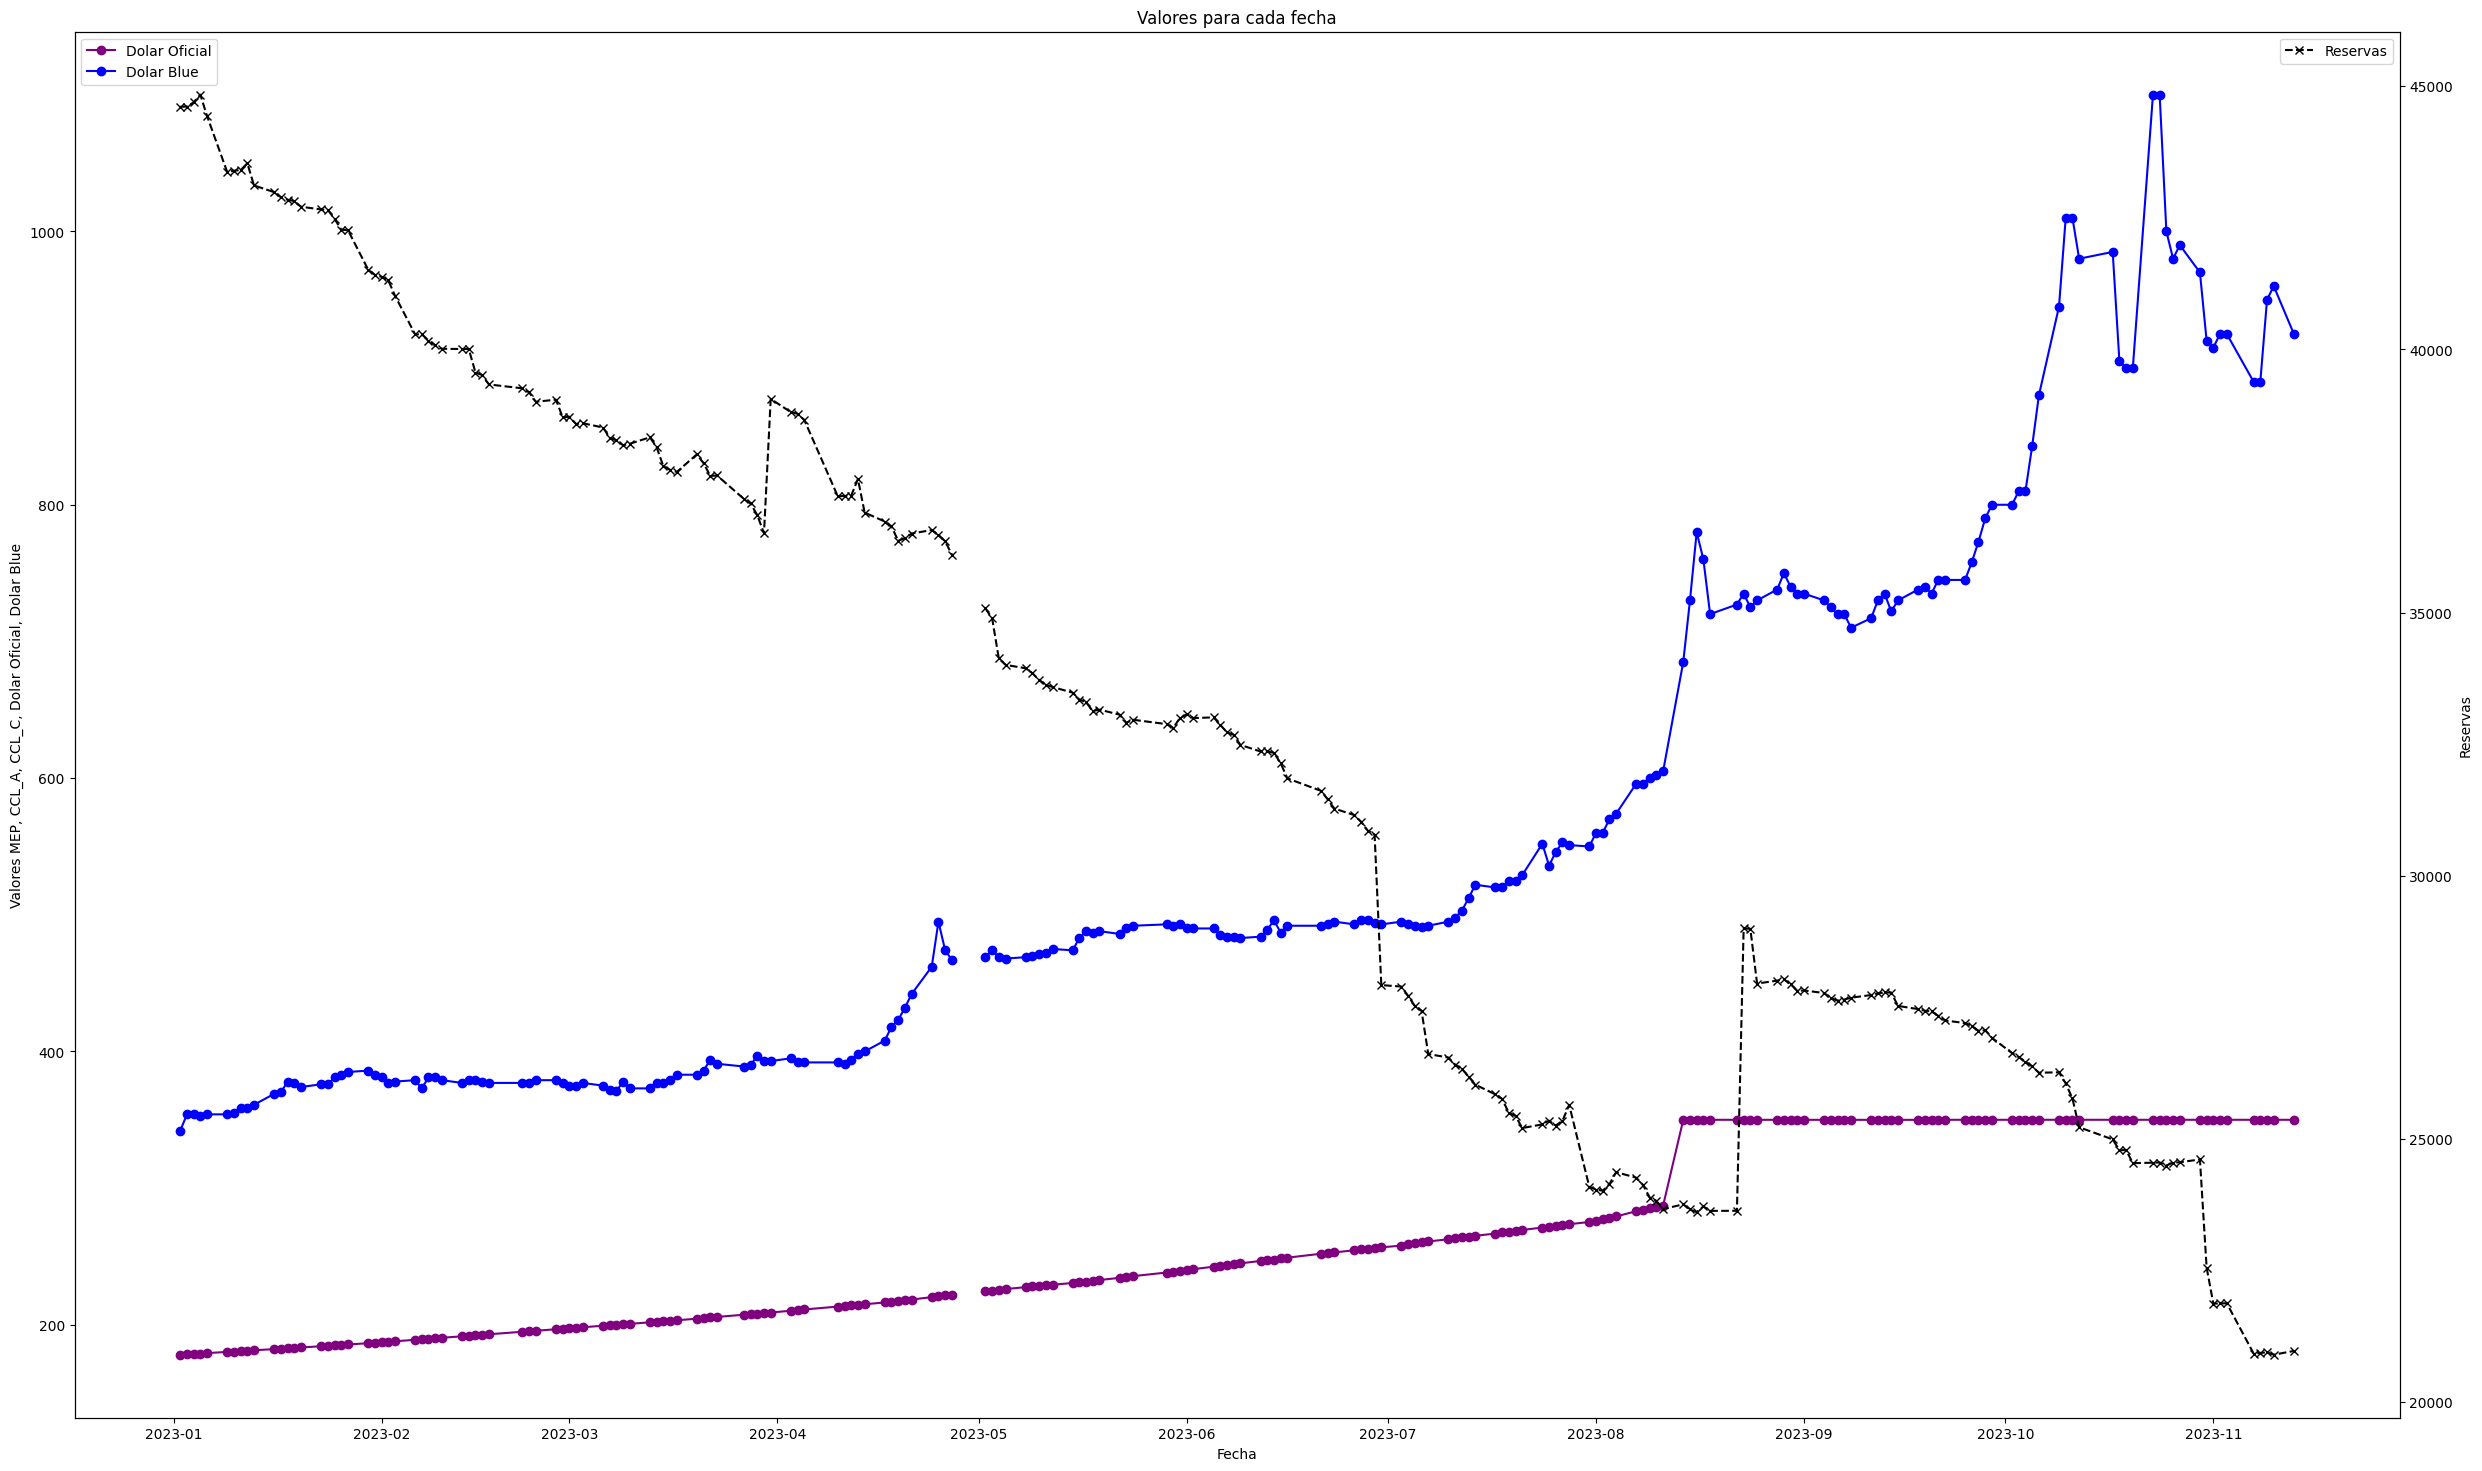

In [ ]:
import matplotlib.pyplot as plt

fechas = df['FECHA'].unique()

data_por_fecha = {}

for fecha in fechas:
    filas_por_fecha = df[df['FECHA'] == fecha]

    valores_dolar = filas_por_fecha['MEP'].unique().tolist()
    valores_ccl_a = filas_por_fecha['CCL_A'].unique().tolist()
    valores_ccl_c = filas_por_fecha['CCL_C'].unique().tolist()
    valores_do = filas_por_fecha['Dolar Oficial'].unique().tolist()
    valores_db = filas_por_fecha['Dolar Blue'].unique().tolist()
    valores_reservas = filas_por_fecha['Reservas'].unique().tolist()

    data_por_fecha[fecha] = {'MEP': valores_dolar, 'CCL_A': valores_ccl_a, 'CCL_C': valores_ccl_c, 'Dolar Oficial': valores_do, 'Dolar Blue': valores_db, 'Reservas': valores_reservas}

fechas_ordenadas = sorted(data_por_fecha.keys())

valores_mep = [data_por_fecha[fecha]['MEP'][0] for fecha in fechas_ordenadas]
valores_ccl_a = [data_por_fecha[fecha]['CCL_A'][0] for fecha in fechas_ordenadas]
valores_ccl_c = [data_por_fecha[fecha]['CCL_C'][0] for fecha in fechas_ordenadas]
valores_do = [data_por_fecha[fecha]['Dolar Oficial'][0] for fecha in fechas_ordenadas]
valores_db = [data_por_fecha[fecha]['Dolar Blue'][0] for fecha in fechas_ordenadas]
valores_reservas = [data_por_fecha[fecha]['Reservas'][0] for fecha in fechas_ordenadas]

fig, ax1 = plt.subplots(figsize=(30, 18))

#ax1.plot(fechas_ordenadas, valores_mep, label='MEP', marker='o', color='r')
#ax1.plot(fechas_ordenadas, valores_ccl_a, label='CCL_A', marker='o', color='g')
#ax1.plot(fechas_ordenadas, valores_ccl_c, label='CCL_C', marker='o', color='r')
ax1.plot(fechas_ordenadas, valores_do, label='Dolar Oficial', marker='o', color='purple')
ax1.plot(fechas_ordenadas, valores_db, label='Dolar Blue', marker='o', color='b')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Valores MEP, CCL_A, CCL_C, Dolar Oficial, Dolar Blue', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
# Segundo eje
ax2 = ax1.twinx()
ax2.plot(fechas_ordenadas, valores_reservas, label='Reservas', marker='x', linestyle='--', color='black')
ax2.set_ylabel('Reservas', color='black')
ax2.tick_params('y', colors='black')
ax2.legend(loc='upper right')

plt.title('Valores para cada fecha')
plt.xticks(rotation=45)
plt.show()

En este grafico se puede apreciar lo que causa el atraso del tipo de cambio en las reservas de un país a medida que se aleja del "precio de mercado" las reservas caen de manera abrupta

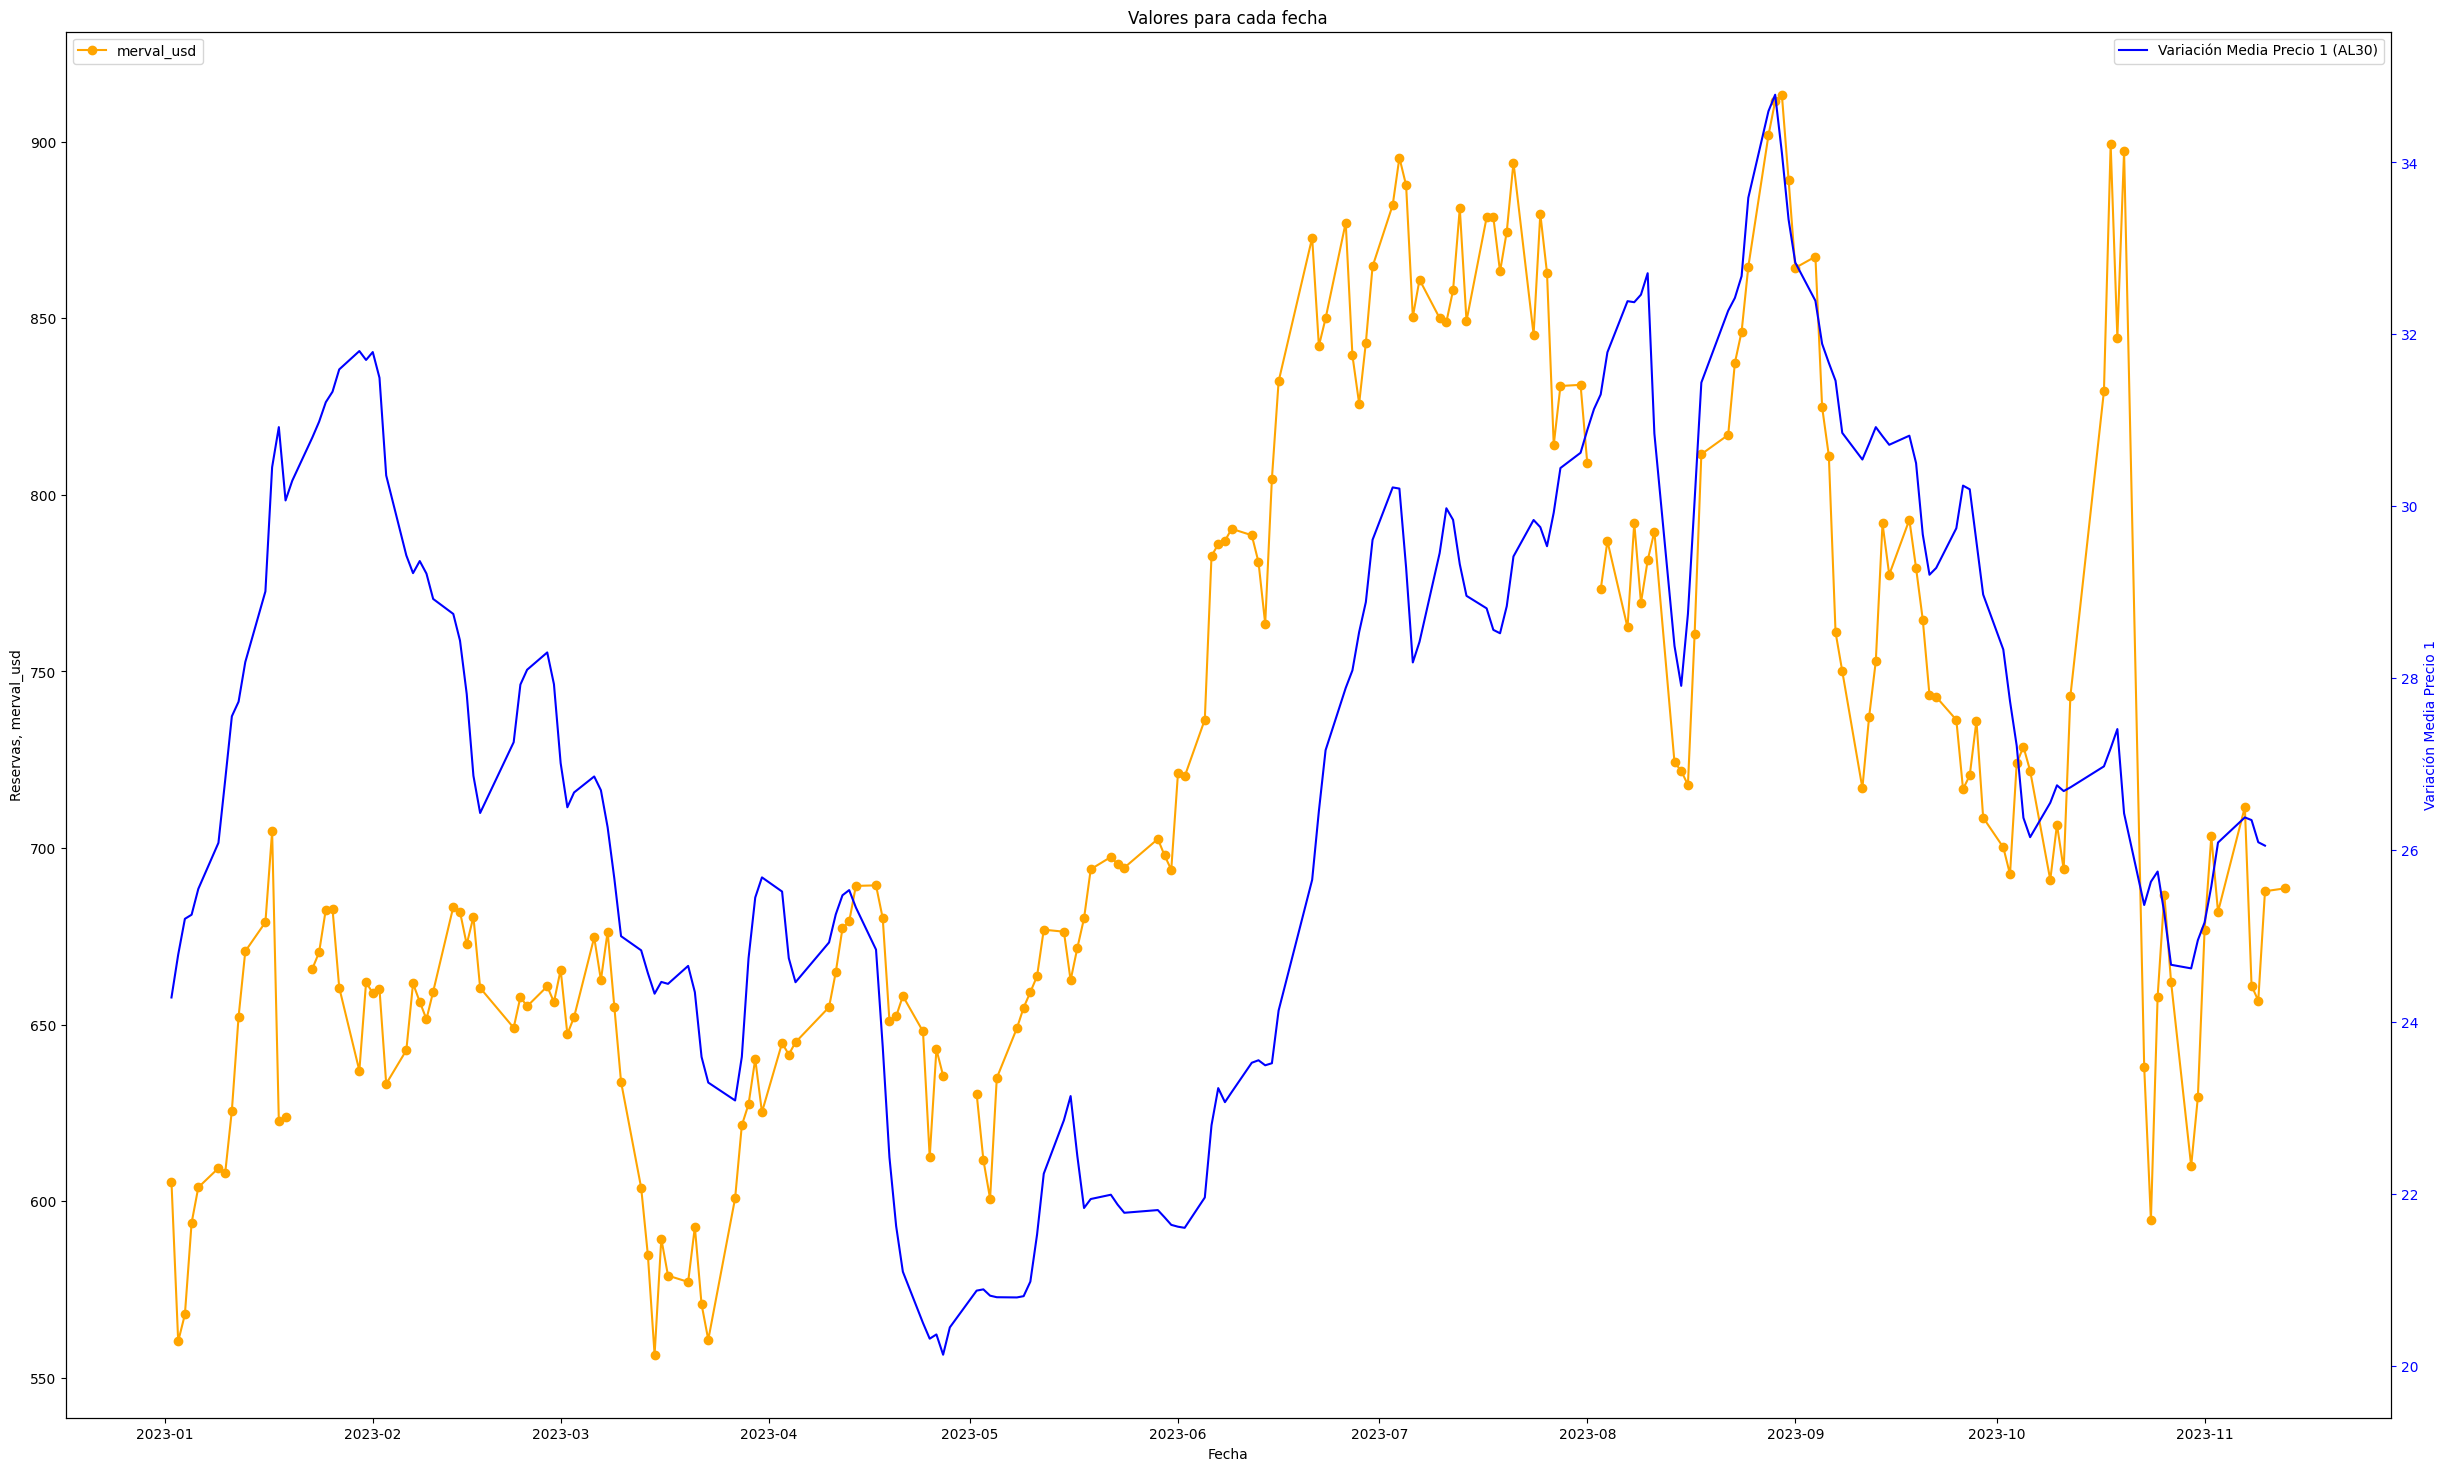

In [ ]:
import matplotlib.pyplot as plt

fechas = df['FECHA'].unique()

data_por_fecha = {}

for fecha in fechas:
    filas_por_fecha = df[df['FECHA'] == fecha]
    valores_r = filas_por_fecha['Reservas'].unique().tolist()
    valores_merval_usd = filas_por_fecha['merval_usd'].unique().tolist()
    data_por_fecha[fecha] = {"Reservas": valores_r, "merval_usd": valores_merval_usd}

fechas_ordenadas = sorted(data_por_fecha.keys())
valores_r = [data_por_fecha[fecha]['Reservas'][0] for fecha in fechas_ordenadas]
valores_merval_usd = [data_por_fecha[fecha]['merval_usd'][0] for fecha in fechas_ordenadas]

variacion_media_precio1_al30 = df[df['SIMBOLO'] == 'AL30D'].groupby('FECHA')['Media_Precio_1'].mean()

fig, ax1 = plt.subplots(figsize=(30, 18))

#ax1.plot(fechas_ordenadas, valores_r, label='Reservas', marker='x', linestyle='--', color='black')
ax1.plot(fechas_ordenadas, valores_merval_usd, label='merval_usd', marker='o', linestyle='-', color='orange')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Reservas, merval_usd', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(variacion_media_precio1_al30.index, variacion_media_precio1_al30.values, label='Variación Media Precio 1 (AL30)', linestyle='-', color='blue')
ax2.set_ylabel('Variación Media Precio 1', color='blue')
ax2.tick_params('y', colors='blue')
ax2.legend(loc='upper right')

plt.title('Valores para cada fecha')
plt.xticks(rotation=45)
plt.show()


En este grafico se puede observar la correlación que existe entre renta fija (AL30) y renta variable (merval). Que luego se confirma con la matriz de correlación.

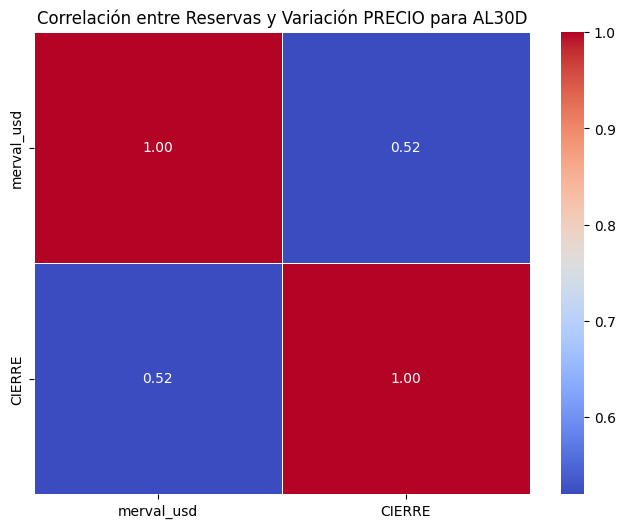

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_al30 = df[df['SIMBOLO'] == 'AL30D']

correlation_matrix = df_al30[['merval_usd', 'CIERRE']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre Merval y AL30D')
plt.show()

Las proximos graficos a incluir son como las variables reales influyen en ciertos sectores, generalmente se dice que el futuro ya está incluido dentro del precio. En realidad está incluido lo que los agentes economicos creen que va a suceder, por lo cual ante la llegada de nuevas noticias se puede pensar a esta información que llega a todos los inversores como cierto componente de recalibración de los precios

In [ ]:
df13 = pd.read_excel(r"/content/sh_isac_2023.xls")
print(df13)

1) Activo con mayor % de variación mensual; benchmark inflación. MERVAL, SPY, QQ, DOLAR CCL OF Y MEP. 2) UVI VS LOMA-HOLCIM-ternium 3) Indicadores de actividad de cemento vs holcim-loma, hierro vs txar